## Accessing your data on Cloudstor via webdav from a python script

- You get 1 TB of storage on Cloudstor as an MQ student
- You can request more for group workspace to share among member

To access your large pile of data from a python script, use webdav

First install the webdavclient library for your python installation.

The project page for the library is here, with the examples I use in this notebook:

https://pypi.org/project/webdavclient/

If you use Anaconda/Jupyter Lab, open an Anaconda prompt, type:

pip install webdavclient

In [38]:
import webdav.client as wc

The webdav url for cloudstor is:

https://cloudstor.aarnet.edu.au/plus/remote.php/webdav/

Login to the web interface at: 

https://cloudstor.aarnet.edu.au

Click on the settings button on the right top area of the browser and then the security tab on the left and create an app password. Suppy it below.

<img src=cloudstor-screenshot.png>

In [39]:
options = {
 'webdav_hostname': "https://cloudstor.aarnet.edu.au",
 'webdav_login':    "blaise-anthony.kuo-tiong@students.mq.edu.au", #your cloudstor login
 'webdav_password': "DAMCW-UTMIC-EATWE-KNHII", #put your app password here
 'webdav_root': "/plus/remote.php/webdav"
}
client = wc.Client(options)

### list files in my cloudstor

In [31]:
files1 = client.list()
print(files1)

['AOSS2018/', 'AdminStuff/', 'Documents/', 'Library/', 'PhDnotes/', 'Photos/', 'Shared/', 'codestore/', 'datastore/', 'dontsync/', 'toDelete/', 'uploads/']


### list a particular directory

In [32]:
path = "datastore/fiber-injection-imaging-27-Nov-2018/271118_144319-infocus/"
files1 = client.list(path)
print(files1)

['Test_144319.txt', 'Test_144319_0000.fit', 'Test_144319_0001.fit', 'Test_144319_0002.fit', 'Test_144319_0003.fit', 'Test_144319_0004.fit']


In [33]:
file = "Test_144319_0001.fit"
client.download_sync(remote_path=(path + file), local_path="downloads/" + file)

### plot the file we grabbed

In [34]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt  

In [35]:
openfits = fits.open("downloads/" + file)

In [36]:
print(openfits[0].data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


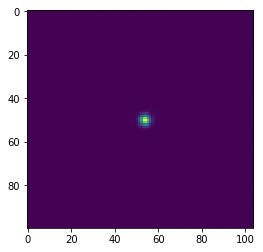

In [40]:
plt.imshow(openfits[0].data)